In [16]:
from skimage.color import rgb2gray
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure

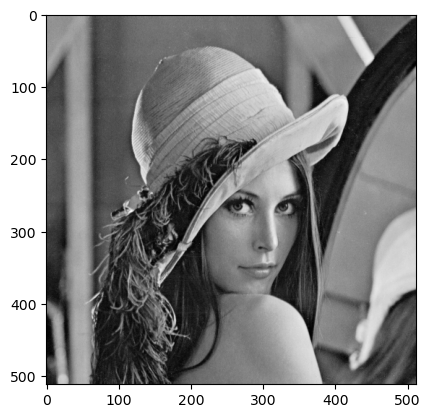

In [17]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff')) *255
lena.astype(np.float64)
cameraman = imread('cameraman.tif').astype(np.float64)
tire = imread('tire.tif').astype(np.float64) / 255.0
plt.imshow(lena)

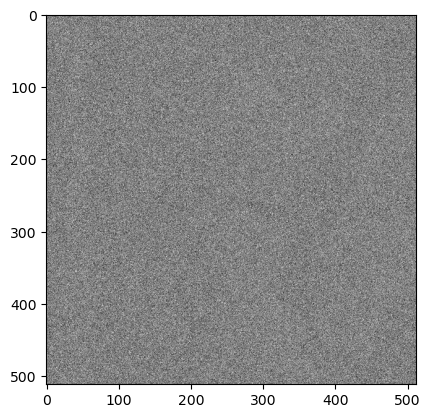

In [18]:
lena_test = np.random.normal(loc=0, scale=1, size=lena.shape) *1000 + lena
plt.imshow(lena_test)

In [19]:
def mse(reference: np.ndarray, test: np.ndarray):
    return (1/reference.size) * np.sum(np.power(reference - test, 2))

def psnr(reference: np.ndarray, test: np.ndarray):
    return 10 * np.log10((255.0 ** 2) / mse(reference, test))

In [20]:
psnr(lena, lena_test)

-11.899349553770175

In [21]:
downscaled = skimage.transform.rescale(lena, .25)

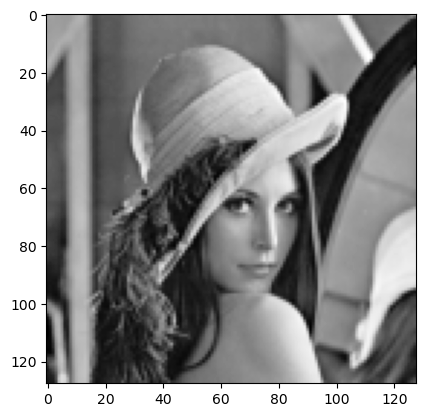

In [22]:
plt.imshow(downscaled)

In [23]:
def upscale(order: int) -> np.ndarray:
    return skimage.transform.rescale(downscaled, 4, order=order)

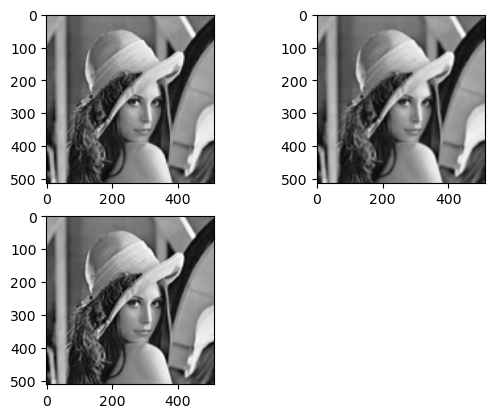

In [24]:
nn = upscale(0)
bil = upscale(1)
bic = upscale(3)
plt.subplot(2, 2, 1)
plt.imshow(nn)

plt.subplot(2, 2, 2)
plt.imshow(bil)

plt.subplot(2, 2, 3)
plt.imshow(bic)

In [25]:
upscaled = [nn, bil, bic]

metrics = zip(["Nearest neighbour", "Bilinear interpolation", "Bicubic interpolation"], [psnr(lena, img) for img in upscaled])
dict(metrics)

{'Nearest neighbour': 26.41381416171506,
 'Bilinear interpolation': 27.076245843461628,
 'Bicubic interpolation': 28.14409121355567}

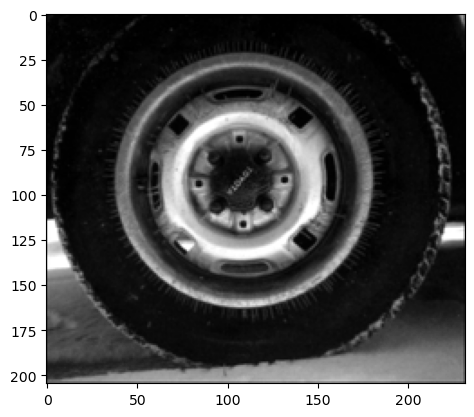

In [29]:
tire /= 255.0
plt.imshow(tire)

(array([25236.,  4967.,  4178.,  3139.,  2826.,  2539.,  2003.,   951.,
          813.,   908.]),
 array([0.00000000e+00, 2.36504429e-11, 4.73008858e-11, 7.09513287e-11,
        9.46017716e-11, 1.18252215e-10, 1.41902657e-10, 1.65553100e-10,
        1.89203543e-10, 2.12853986e-10, 2.36504429e-10]),
 <BarContainer object of 10 artists>)

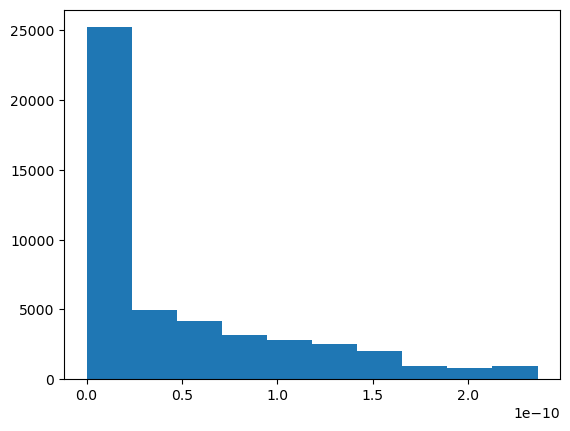

In [30]:
plt.hist(tire.flatten())

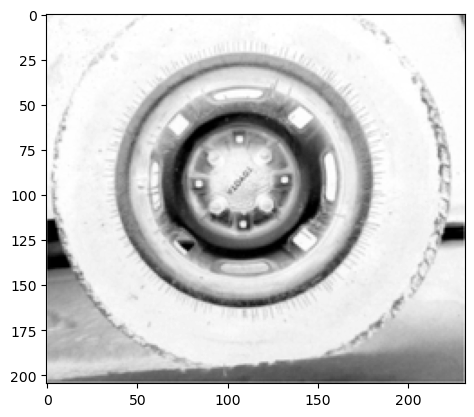

In [32]:
tire *= -1
plt.imshow(tire)

(array([  908.,   813.,   951.,  2003.,  2539.,  2711.,  3254.,  4031.,
         5114., 25236.]),
 array([-2.36504429e-10, -2.12853986e-10, -1.89203543e-10, -1.65553100e-10,
        -1.41902657e-10, -1.18252215e-10, -9.46017716e-11, -7.09513287e-11,
        -4.73008858e-11, -2.36504429e-11, -0.00000000e+00]),
 <BarContainer object of 10 artists>)

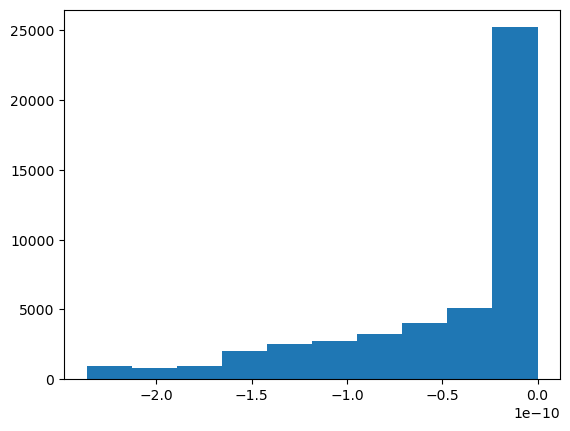

In [33]:
plt.hist(tire.flatten())

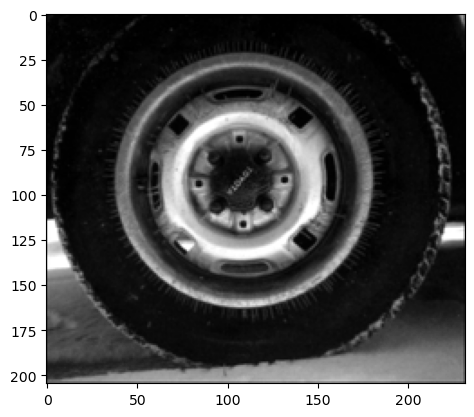

In [37]:
tire *= -1 # revert prev

plt.imshow(tire)

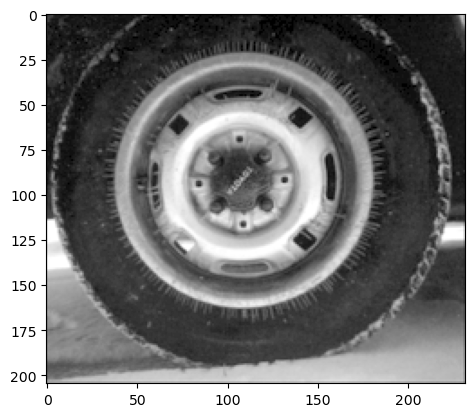

In [43]:
new_tire1 = tire ** 0.5
new_tire2 = tire ** 1.3

plt.imshow(new_tire1)

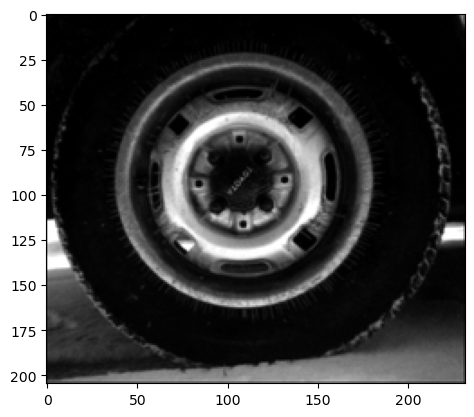

In [44]:
plt.imshow(new_tire2)

(array([ 4401.,  9762., 10145.,  4351.,  3501.,  4198.,  3669.,  3875.,
         2043.,  1615.]),
 array([0.00000000e+00, 1.53787005e-06, 3.07574010e-06, 4.61361015e-06,
        6.15148020e-06, 7.68935025e-06, 9.22722030e-06, 1.07650903e-05,
        1.23029604e-05, 1.38408304e-05, 1.53787005e-05]),
 <BarContainer object of 10 artists>)

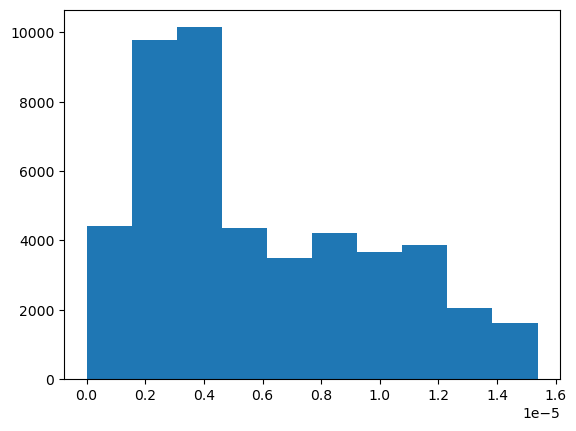

In [45]:
plt.hist(new_tire1.flatten())

(array([29173.,  4724.,  3623.,  2721.,  2353.,  1977.,   943.,   686.,
          564.,   796.]),
 array([0.00000000e+00, 3.06190042e-14, 6.12380083e-14, 9.18570125e-14,
        1.22476017e-13, 1.53095021e-13, 1.83714025e-13, 2.14333029e-13,
        2.44952033e-13, 2.75571037e-13, 3.06190042e-13]),
 <BarContainer object of 10 artists>)

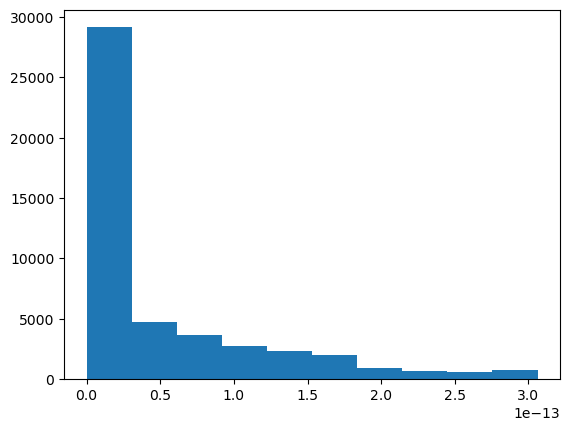

In [46]:
plt.hist(new_tire2.flatten())

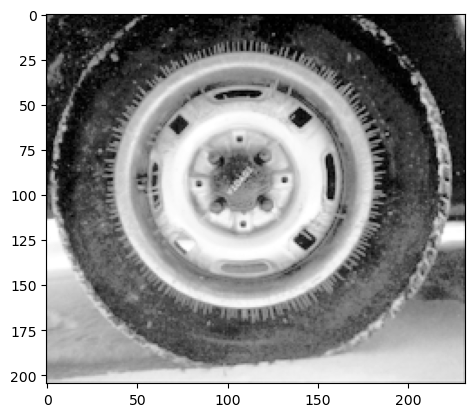

In [47]:
new_tire3 = skimage.exposure.equalize_hist(tire)
plt.imshow(new_tire3)

(array([4401., 5180., 4582., 5429., 4402., 4665., 4690., 4758., 4684.,
        4769.]),
 array([0.01002944, 0.10902649, 0.20802355, 0.30702061, 0.40601766,
        0.50501472, 0.60401177, 0.70300883, 0.80200589, 0.90100294,
        1.        ]),
 <BarContainer object of 10 artists>)

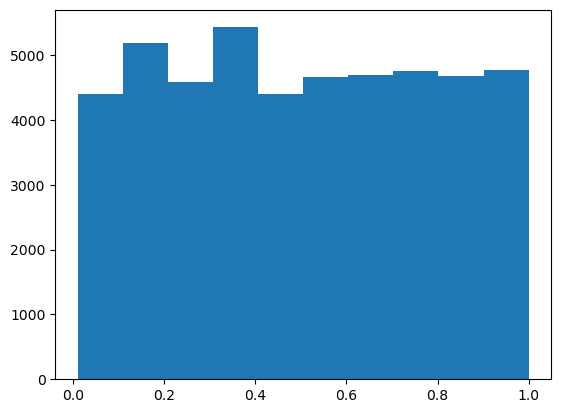

In [48]:
plt.hist(new_tire3.flatten())